<a href="https://colab.research.google.com/github/santoshkumarbvp/Computer-Vision/blob/main/transfer%20learning/CIFAR_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from glob import glob
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

In [7]:
tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [8]:
from tensorflow.keras.datasets import cifar10

In [13]:
cf = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [70]:
(x_train, y_train), (x_test, y_test) = cf

[0]


(<matplotlib.image.AxesImage at 0x7f68dcda99b0>, None)

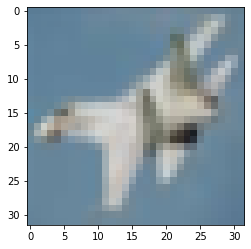

In [38]:
plt.imshow(x_test[10]), print(y_test[10])

In [45]:
input_shape=(32,32,3)

In [71]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Simple ANN

In [57]:
model_ann = Sequential()
model_ann.add(Flatten(input_shape=input_shape))
model_ann.add(Dense(units=128, activation='relu'))
model_ann.add(Dense(units=254, activation='relu'))
model_ann.add(Dense(units=254, activation='relu'))
model_ann.add(Dense(units=10, activation='softmax'))


model_ann.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])



In [50]:
model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_5 (Dense)              (None, 254)               32766     
_________________________________________________________________
dense_6 (Dense)              (None, 254)               64770     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2550      
Total params: 493,430
Trainable params: 493,430
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_ann.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 20)

Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3031 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3050 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy:

# It is expected that, in ANN model accuracy would be low. it is just 10%

# Simple CNN

In [61]:
model_cnn = Sequential()
model_cnn.add(Conv2D(input_shape=input_shape,filters=32, kernel_size=(3,3),activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(10,activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])


In [62]:
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

In [63]:
model_cnn.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 20)

Epoch 1/20
1563/1563 [==============================] - 10s 3ms/step - loss: 3.5133 - accuracy: 0.2479 - val_loss: 1.5231 - val_accuracy: 0.4446
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5224 - accuracy: 0.4490 - val_loss: 1.4394 - val_accuracy: 0.4904
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3273 - accuracy: 0.5300 - val_loss: 1.3030 - val_accuracy: 0.5339
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2227 - accuracy: 0.5735 - val_loss: 1.2581 - val_accuracy: 0.5598
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1513 - accuracy: 0.5969 - val_loss: 1.1472 - val_accuracy: 0.5960
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0815 - accuracy: 0.6202 - val_loss: 1.1252 - val_accuracy: 0.6117
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0337 - accuracy: 0.6404 - val_loss: 1.1495 - val_accuracy

# In CNN, it improved till 73%

# Lets play around more



1.   Normalize the data
2.   Add more parameters



In [66]:
x_train[0].max(),x_train[0].min()

(255, 0)

In [72]:
x_train_n = x_train/255
x_test_n = x_test/255

In [73]:
model_cnn.fit(x_train_n,y_train,validation_data=(x_test_n,y_test), epochs= 20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7990 - accuracy: 0.3378 - val_loss: 1.5960 - val_accuracy: 0.4143
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5057 - accuracy: 0.4529 - val_loss: 1.4355 - val_accuracy: 0.4752
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3805 - accuracy: 0.5013 - val_loss: 1.3290 - val_accuracy: 0.5162
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2718 - accuracy: 0.5467 - val_loss: 1.2742 - val_accuracy: 0.5493
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1793 - accuracy: 0.5816 - val_loss: 1.1633 - val_accuracy: 0.5941
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1021 - accuracy: 0.6103 - val_loss: 1.1307 - val_accuracy: 0.5956
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0392 - accuracy: 0.6334 - val_loss: 1.0922 - val_accuracy:

# Accuracy improved till 77%

# Adding more parameter

In [78]:
model_cnn = Sequential()
model_cnn.add(Conv2D(input_shape=input_shape,filters=64, kernel_size=(3,3),activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(10,activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])


In [79]:
model_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [80]:
es = EarlyStopping(monitor='accuracy',patience=3)

In [81]:
model_cnn.fit(x_train_n,y_train,validation_data=(x_test_n,y_test), epochs= 20, callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 3.4287 - accuracy: 0.3471 - val_loss: 1.2800 - val_accuracy: 0.5494
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2668 - accuracy: 0.5526 - val_loss: 1.2775 - val_accuracy: 0.5568
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1239 - accuracy: 0.6122 - val_loss: 1.3202 - val_accuracy: 0.5556
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0278 - accuracy: 0.6446 - val_loss: 1.0535 - val_accuracy: 0.6469
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9480 - accuracy: 0.6751 - val_loss: 1.0511 - val_accuracy: 0.6524
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8852 - accuracy: 0.6957 - val_loss: 1.0130 - val_accuracy: 0.6737
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8218 - accuracy: 0.7153 - val_loss: 1.1512 - val_accuracy:

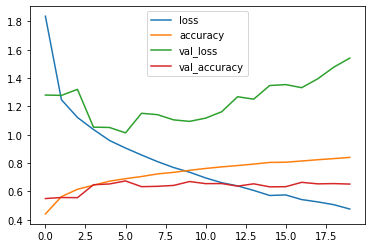

In [86]:
pd.DataFrame(model_cnn.history.history).plot()

In [91]:
pred = model_cnn.predict(x_test)

In [93]:
pred_i = np.array([np.argmax(i) for i in pred] )

In [96]:
confusion_matrix(np.array([np.argmax(i) for i in y_test] ),pred_i)

array([[747,  14,  48,  22,  28,  10,   7,  11,  87,  26],
       [ 38, 808,   3,  17,   5,   5,  11,   1,  26,  86],
       [ 84,   9, 532,  98,  80,  70,  60,  38,  15,  14],
       [ 31,  12,  60, 549,  60, 151,  62,  38,  20,  17],
       [ 37,   5,  78, 133, 550,  50,  53,  72,  15,   7],
       [ 18,   4,  56, 239,  40, 549,  33,  45,   7,   9],
       [ 12,   6,  52, 113,  46,  27, 708,  22,   9,   5],
       [ 30,   5,  37,  99,  79,  71,  13, 642,   6,  18],
       [129,  31,  16,  24,  10,   5,  10,   5, 740,  30],
       [ 58,  99,  21,  37,  13,  12,  12,  18,  39, 691]])

In [98]:
print(classification_report(np.array([np.argmax(i) for i in y_test] ),pred_i))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68      1000
           1       0.81      0.81      0.81      1000
           2       0.59      0.53      0.56      1000
           3       0.41      0.55      0.47      1000
           4       0.60      0.55      0.58      1000
           5       0.58      0.55      0.56      1000
           6       0.73      0.71      0.72      1000
           7       0.72      0.64      0.68      1000
           8       0.77      0.74      0.75      1000
           9       0.77      0.69      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



# Lets implement the VGG16

In [100]:
vgg16 = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 1s 0us/step


In [101]:
for layer in vgg16.layers:
  layer.trainable=False

In [102]:
f_layer = Flatten()(vgg16.output)
out_layer = Dense(10,activation='softmax')(f_layer)

model_vgg = Model(inputs=vgg16.input, outputs = out_layer)

In [105]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [106]:
model_vgg.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics=['accuracy'])

In [107]:
es_vgg = EarlyStopping(monitor='accuracy',patience=2)


In [108]:
result_vgg = model_vgg.fit(x_train_n,y_train,validation_data=(x_test_n,y_test), epochs= 20, callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 14s 8ms/step - loss: 1.7296 - accuracy: 0.4069 - val_loss: 1.3772 - val_accuracy: 0.5296
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3278 - accuracy: 0.5495 - val_loss: 1.3030 - val_accuracy: 0.5506
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2548 - accuracy: 0.5712 - val_loss: 1.2649 - val_accuracy: 0.5642
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2239 - accuracy: 0.5812 - val_loss: 1.2429 - val_accuracy: 0.5696
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1977 - accuracy: 0.5889 - val_loss: 1.2266 - val_accuracy: 0.5753
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1840 - accuracy: 0.5935 - val_loss: 1.2186 - val_accuracy: 0.5778
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1695 - accuracy: 0.5986 - val_loss: 1.2197 - val_ac

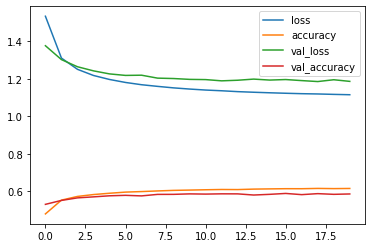

In [109]:
pd.DataFrame(model_vgg.history.history).plot()

#VGG19

In [112]:
from tensorflow.keras.applications import Xception, VGG19

In [113]:
vgg19 = VGG19(input_shape=input_shape, weights='imagenet', include_top=False)


80142336/80134624 [==============================] - 0s 0us/step


In [114]:
for layer in vgg19.layers:
  layer.trainable=False

In [115]:
f_layer = Flatten()(vgg19.output)
out_layer = Dense(10,activation='softmax')(f_layer)

model_vgg19 = Model(inputs=vgg19.input, outputs = out_layer)

In [116]:
model_vgg19.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [117]:
model_vgg19.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics=['accuracy'])

In [120]:
es_vgg19 = EarlyStopping(monitor='accuracy',patience=7)


In [121]:
result_vgg19 = model_vgg19.fit(x_train_n,y_train,validation_data=(x_test_n,y_test), epochs= 50, callbacks=[es])

Epoch 1/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1424 - accuracy: 0.6016 - val_loss: 1.2116 - val_accuracy: 0.5807
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1405 - accuracy: 0.6021 - val_loss: 1.2115 - val_accuracy: 0.5811
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1397 - accuracy: 0.6019 - val_loss: 1.2075 - val_accuracy: 0.5829
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1386 - accuracy: 0.6022 - val_loss: 1.2211 - val_accuracy: 0.5768
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1374 - accuracy: 0.6041 - val_loss: 1.2081 - val_accuracy: 0.5816
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1372 - accuracy: 0.6035 - val_loss: 1.2146 - val_accuracy: 0.5803
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1364 - accuracy: 0.6030 - val_loss: 1.2118 -